/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [y, sigma, mu]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 14 seconds.
There were 2027 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6613714331625662, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1543 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7064652733253344, but should be close to 0.8. Try to increase the number of tuning steps.
There were 3741 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5066897639865938, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some p

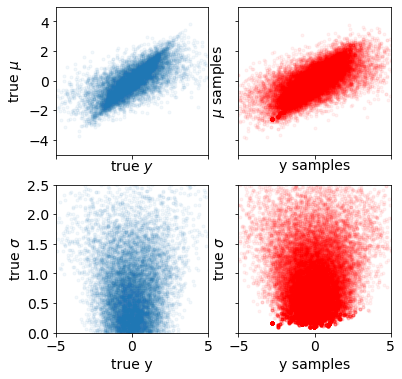

/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [yt, sigma, mu]


Sampling 3 chains for 1_000 tune and 10_000 draw iterations (3_000 + 30_000 draws total) took 12 seconds.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
There were 69 divergences after tuning. Increase `target_accept` or reparameterize.
There were 79 divergences after tuning. Increase `target_accept` or reparameterize.


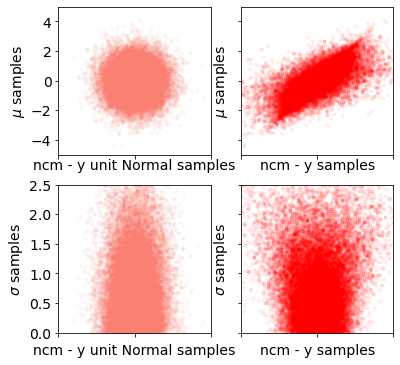

In [29]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy.stats import norm, halfcauchy, halfnorm


def centered_model():

    # generate data
    np.random.seed(0)
    n = 1
    m = 10000
    mu = norm.rvs(0, 1, m)
    sigma = halfnorm.rvs(0, 1, m)
    y = norm.rvs(mu, sigma, (n, m))

    # set up model
    with pm.Model():

        mu_ = pm.Normal("mu", 0, 1)
        sigma_ = pm.HalfNormal("sigma", 1)
        y_ = pm.Normal("y", mu_, sigma_, shape=n)

        # sample and save samples
        trace = pm.sample(m, chains=3)
        mu_samples = trace["mu"][:]
        sigma_samples = trace["sigma"][:]
        y_samples = trace["y"].T[:]
        
    sc = 5
    fig, axes = plt.subplots(2, 2, constrained_layout=False, sharex=True)
    ax = axes[0, 0]
    ax.scatter(y[0], mu, marker=".", alpha=0.05, rasterized=True)
    ax.set_xlim(-sc, sc)
    ax.set_ylim(-sc, sc)
    ax.set_ylabel("true $\mu$")
    ax.set_xlabel("true $y$")

    ax = axes[0, 1]
    ax.scatter(y_samples[0], mu_samples, marker=".", alpha=0.05, rasterized=True, color="r")
    ax.set_ylim(-sc, sc)
    ax.set_xlim(-sc, sc)
    ax.set_yticklabels([])
    ax.set_ylabel("$\mu$ samples")
    ax.set_xlabel("y samples")

    ax = axes[1, 0]
    ax.scatter(y[0], sigma, marker=".", alpha=0.05, rasterized=True)
    ax.set_ylim(0, sc / 2)
    ax.set_ylabel("true $\sigma$")
    ax.set_xlabel("true y")
    
    ax = axes[1, 1]
    ax.scatter(y_samples[0], sigma_samples, marker=".", alpha=0.05, rasterized=True, color="r")
    ax.set_ylim(0, sc / 2)
    ax.set_yticklabels([])
    ax.set_ylabel("true $\sigma$")
    ax.set_xlabel("y samples")

    plt.show()
    return(trace)
    

    
def noncentered_model():

    # generate data
    np.random.seed(0)
    n = 1
    m = 10000
    mu = norm.rvs(0, 1, m)
    sigma = halfnorm.rvs(0, 1, m)
    y = norm.rvs(mu, sigma, (n, m))

    # set up model
    with pm.Model():

        mu_ = pm.Normal("mu", 0, 1)
        sigma_ = pm.HalfNormal("sigma", 1)
        yt_ = pm.Normal("yt", 0, 1, shape=n)
        pm.Deterministic("y", mu_ + yt_ * sigma_)
        # y_ = pm.Normal("y", mu_, sigma_, shape=n)

        # sample and save samples
        trace = pm.sample(m, chains=3)
        mu_samples = trace["mu"][:]
        sigma_samples = trace["sigma"][:]
        yt_samples = trace["yt"].T[:]
        y_samples = trace["y"].T[:]

    # plot 2-D figures
    sc = 5
    fig, axes = plt.subplots(2, 2, constrained_layout=False, sharex=True)
    
    ax = axes[0, 0]
    ax.scatter(yt_samples[0], mu_samples, marker=".", alpha=0.05, rasterized=True, color="salmon")
    ax.set_xlim(-sc, sc)
    ax.set_ylim(-sc, sc)
    ax.set_ylabel("$\mu$ samples")
    ax.set_xlabel("ncm - y unit Normal samples")
    ax.set_xticklabels([])

    ax = axes[0, 1]
    ax.scatter(y_samples[0], mu_samples, marker=".", alpha=0.05, rasterized=True, color="r")
    ax.set_xlim(-sc, sc)
    ax.set_ylim(-sc, sc)
    ax.set_ylabel("$\mu$ samples")
    ax.set_xlabel("ncm - y samples")
    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax = axes[1, 0]
    ax.scatter(yt_samples[0], sigma_samples, marker=".", alpha=0.05, rasterized=True, color="salmon")
    ax.set_xlim(-sc, sc)
    ax.set_ylim(0, sc / 2)
    ax.set_xlabel("ncm - y unit Normal samples")
    ax.set_ylabel("$\sigma$ samples")

    ax = axes[1, 1]
    ax.scatter(y_samples[0], sigma_samples, marker=".", alpha=0.05, rasterized=True, color="r")
    ax.set_xlim(-sc, sc)
    ax.set_ylim(0, sc / 2)
    ax.set_yticklabels([])
    ax.set_xlabel("ncm - y samples")
    ax.set_ylabel("$\sigma$ samples")
    
    plt.show()
    return(trace)


trace_cm = centered_model()
trace_ncm = noncentered_model()

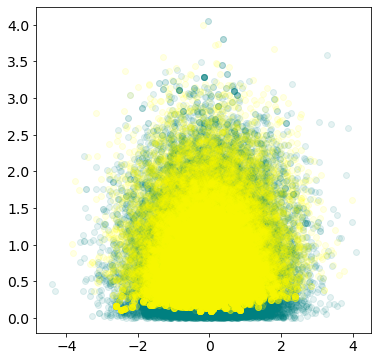

In [42]:
plt.figure()
plt.scatter(trace_ncm['mu'], trace_ncm['sigma'],c='teal', alpha=0.1)
plt.scatter(trace_cm['mu'], trace_cm['sigma'], c='yellow', alpha=0.1)
plt.show()

#### Traceplot

------------ Centered model ------------


/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,-0.095,0.970,-1.865,1.820,0.042,0.030,535.0,535.0,578.0,554.0,1.01
y[0],-0.109,1.406,-2.795,2.447,0.046,0.033,931.0,931.0,804.0,782.0,1.01
sigma,0.791,0.586,0.095,1.861,0.050,0.036,135.0,135.0,50.0,9.0,1.06


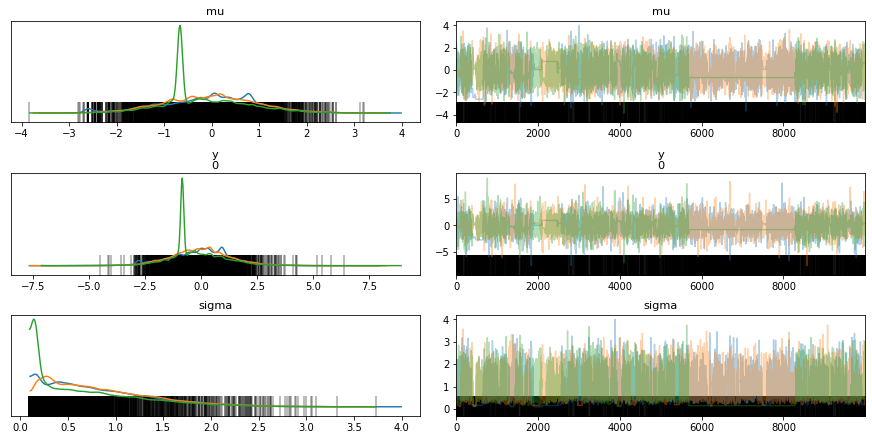

In [43]:
import arviz as az
print("------------ Centered model ------------")

# The bars indicate the location of the divergences in the sampling process
az.plot_trace(trace_cm, divergences='bottom')
az.summary(trace_cm)

------------ Non-centered model ------------


/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu,-0.001,1.005,-1.902,1.851,0.007,0.006,21283.0,14008.0,21272.0,17802.0,1.0
yt[0],0.008,1.009,-1.851,1.901,0.008,0.006,17563.0,14233.0,17563.0,17653.0,1.0
sigma,0.812,0.604,0.000,1.903,0.005,0.003,16672.0,16672.0,12311.0,9148.0,1.0
y[0],0.014,1.429,-2.635,2.732,0.011,0.008,18363.0,16850.0,18828.0,17084.0,1.0


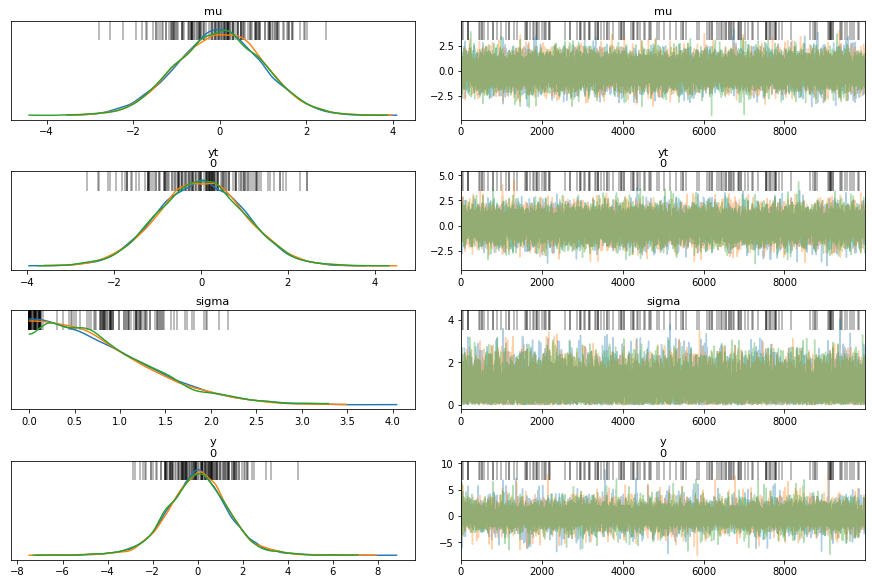

In [44]:
print("------------ Non-centered model ------------")

# The bars indicate the locations of divergences in the sampling process
az.plot_trace(trace_ncm, divergences='top')
az.summary(trace_ncm)

1. The KDE has more agreement for the non-centered model(ncm) compared to the centered model (cm) for the different chains.
2. There are more divergences for cm compared to the ncm as can be seen from the vertical bars in the trace plot. 
3. In general, ncm mixes better than cm - ncm looks like evenly mixed while cm looks patchy in certain regions. 
4. It is possible to see flat lines in the trace, a flat indicates that the same sample value is being used because all new proposed samples are being rejected, in other words the sampler is samping slowly and not getting to a different space in the manifold. The only fix here is to sample for longer periods of time, however we are assuming we can get more unbiased samples if we let it run for longer.


#### Forest Plot

We plot the densities of both the cm and the ncm models, notice the differences in effective sample sizes for
the cm (very low).

array([<AxesSubplot:>, <AxesSubplot:title={'center':'ess'}>,
       <AxesSubplot:title={'center':'r_hat'}>], dtype=object)

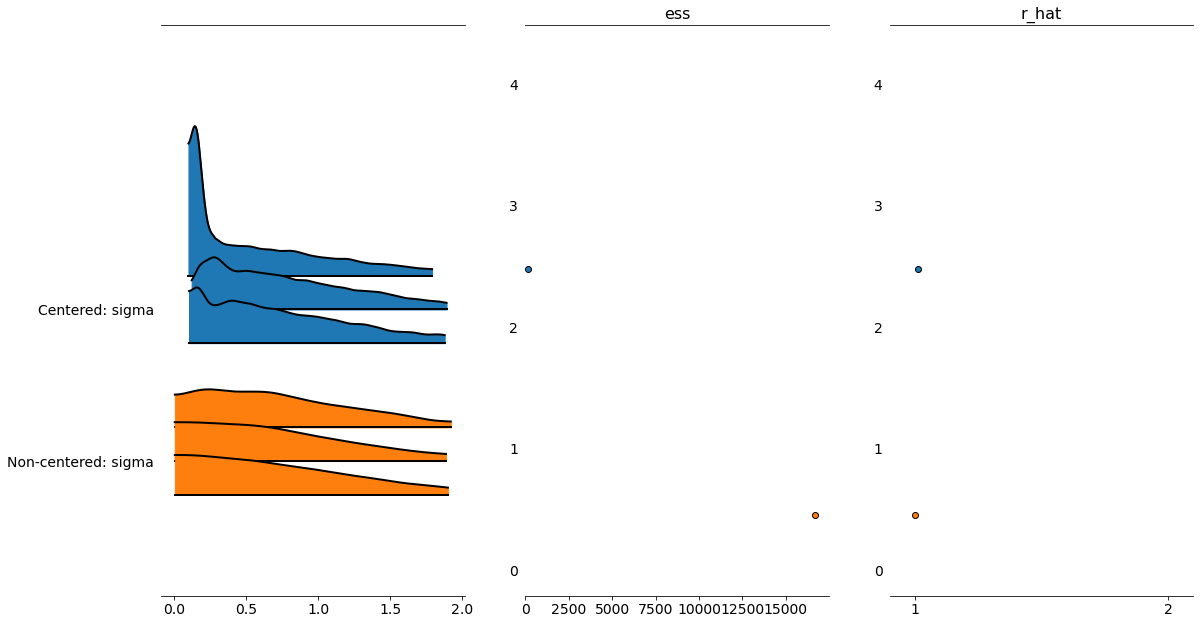

In [46]:

fig, axs = plt.subplots(1,3)
fig.set_size_inches(18.5, 10.5)
az.plot_forest([trace_cm, trace_ncm], var_names=['sigma'], 
               kind = 'ridgeplot',
               model_names=['Centered','Non-centered'],
               combined=False, 
               ess=True, 
               r_hat=True, 
               ax=axs[0:3], 
               figsize=(20,20) )
#az.plot_forest(trace_ncm, var_names=['a'],
#               kind='ridgeplot',
#               combined=False, 
#               ess=True, 
#               r_hat=True, 
#               ax=axs[1,0:3])

#### Autocorrelation and effective sample sizes

Ideally, we would like to have zero correlation in the samples that are drawn. Correlated samples violate our condition of independence and can give us biased posterior estimates of our posterior distribution. 
Thinning or pruning refers to the process of dropping every nth sample from a chain. This is to minimize the number of correlated samples that might be drawn, especially if the proposal distribution is narrow. The autocorrelation plot computes the correlation of a sequence with itself but shifted by n, for each n on the x axis the corresponding value of autocorrelation is plotted on the y axis.  

`az.plot_autocorr(trace, var_names=["a", "b"])`

Techniques like Metropolis-Hastings are susceptible to having auto-correlated samples. We plot the autcorrelation here for the cm and the ncm models. The cm models have samples that have a high degree of autocorrelation while the ncm models does not.

/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'sigma\n0'}>,
       <AxesSubplot:title={'center':'sigma\n1'}>,
       <AxesSubplot:title={'center':'sigma\n2'}>], dtype=object)

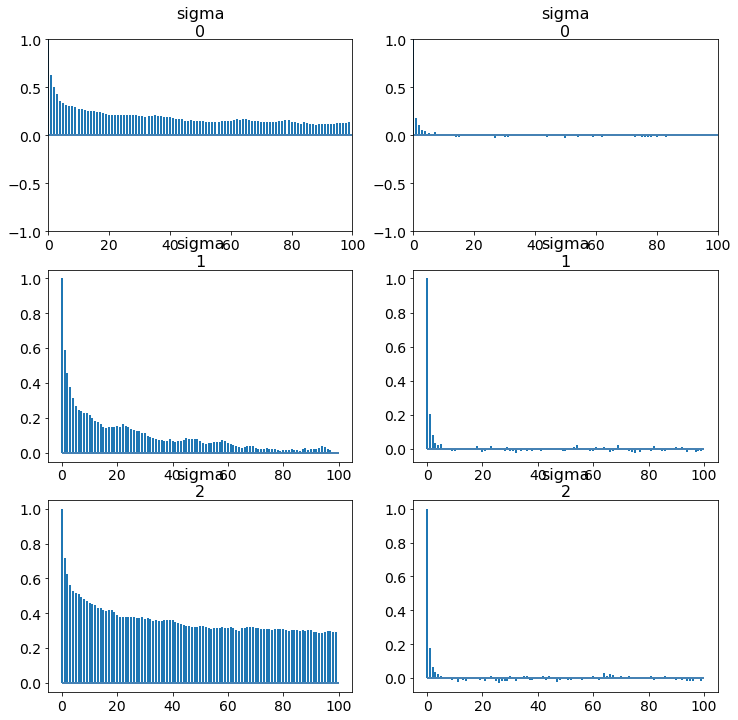

In [51]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(12, 12)
az.plot_autocorr(trace_cm, var_names=['sigma'], ax=axs[0:3,0])
az.plot_autocorr(trace_ncm, var_names=['sigma'], ax=axs[0:3,1])

Since a chain with autocorrelation has fewer samples that are independent, we can calculate the number of effective samples called the effective sample size. This is listed during when a summary of the trace is printed out, however it can also be explicitly computed using

`az.efective_n(trace_s)`

PyMC3 will throw a warning if the number of effective samples is less than 200 (200 is heuristically determined to provide a good approximation for the mean of a distribution). Unless you want to sample from the tails of a distribution (rare events), 1000 to 2000 samples should provide a good approximation for a distribution.

#### Monte Carlo error 

The Monte Carlo error is a measure of the error of our sampler which stems from the fact that not all samples that we have drawn are independent. This error is defined by dividing a trace into n blocks. We then compute the mean of these blocks and calculate the error as the standard deviation of these means over the square root of the number of blocks.

$mc_{error} = \sigma(\mu(block_i)) / \sqrt(n)$


#### Divergence

Divergences happen in regions of high curvature or high gradientt in the manifold. When PyMC3 detects a divergence it abandons that chain and as a result the samples that are reported to have been diverging are close to the space of high curvature but not necessarily right on it.

In some cases, PyMC3 can indicate falsely that some samples are divergences, this is due to the heuristics used to identify divergences. Concentration of samples in a region is an indication that these are not divergences. 

We visualize this for the cm and ncm models with pairplots of the variables. You can see how the cm models have difficulty sampling at the edge of the funnel shaped two-dimensional manifold formed by the pairplot. This is a result of the sharp discontinuity where the sampler is having difficulty sampling. 

In [54]:
# Get the divergences
print("Number of divergences in cm model, %d and percent %lf " % (trace_cm['diverging'].nonzero()[0].shape[0], trace_cm['diverging'].nonzero()[0].shape[0]/ len(trace_cm) * 100))
divergent = trace_cm['diverging']

print("Number of divergences in ncm model, %d and percent %lf " % (trace_ncm['diverging'].nonzero()[0].shape[0], trace_ncm['diverging'].nonzero()[0].shape[0]/ len(trace_ncm) * 100))
divergent = trace_cm['diverging']

Number of divergences in cm model, 7311 and percent 73.110000 
Number of divergences in ncm model, 157 and percent 1.570000 


##### Pairplots

Centered model


/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:ylabel='sigma'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='mu', ylabel='y\n0'>,
        <AxesSubplot:xlabel='sigma'>]], dtype=object)

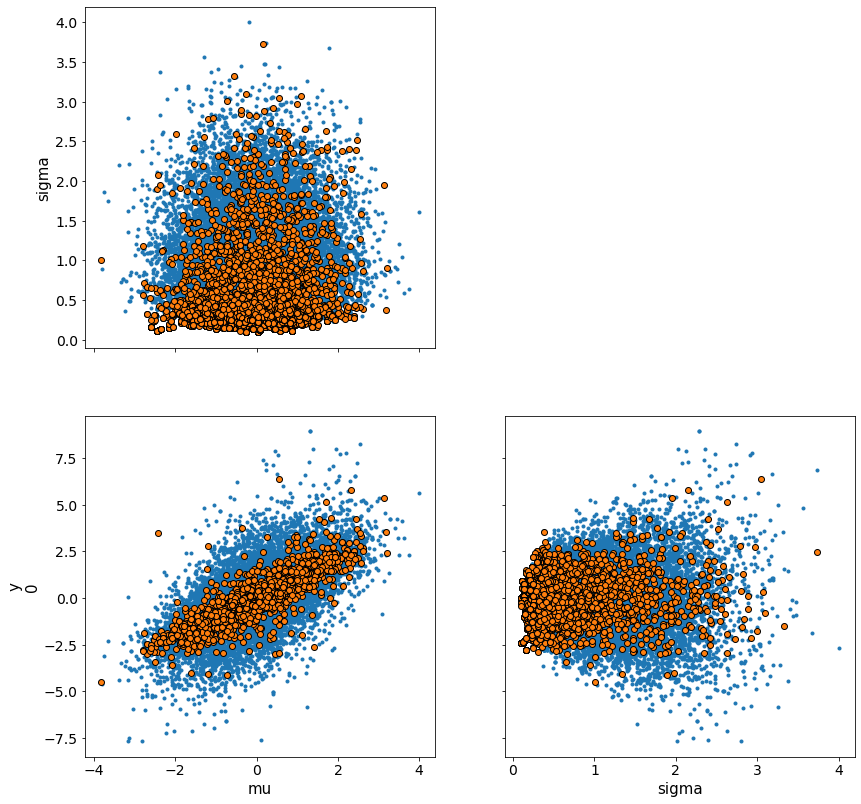

In [56]:
print("Centered model")
az.plot_pair(trace_cm, var_names = ['mu', 'sigma', 'y'], divergences=True)

Non-centered model


/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:ylabel='sigma'>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='mu', ylabel='y\n0'>,
        <AxesSubplot:xlabel='sigma'>]], dtype=object)

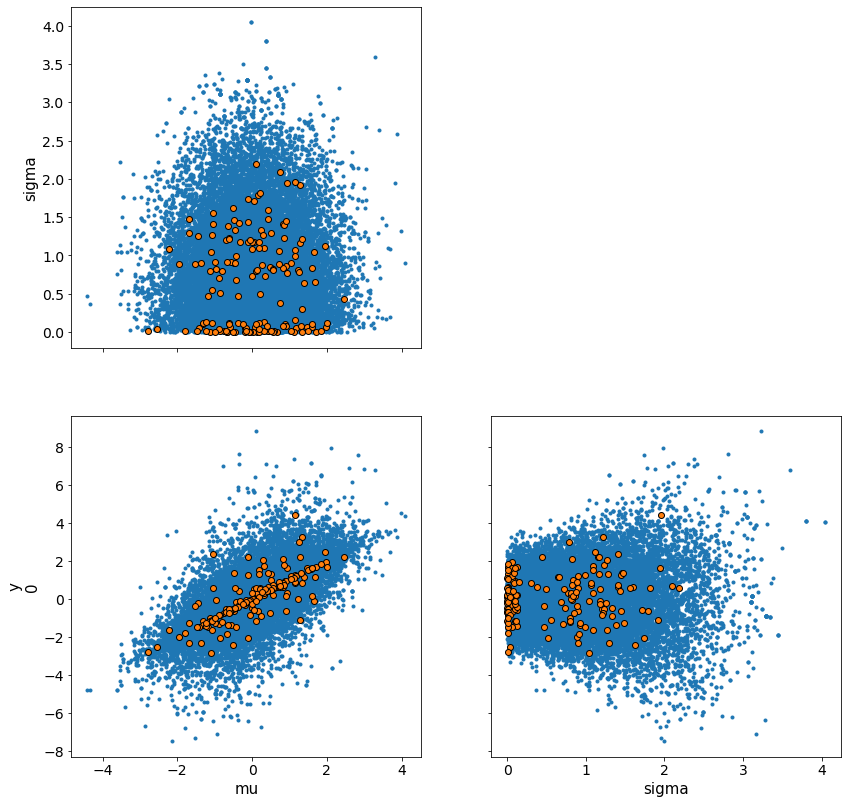

In [57]:
print("Non-centered model")
az.plot_pair(trace_ncm, var_names = ['mu', 'sigma', 'y'], divergences=True)

##### Parallel Plots

You can also have a parallel coordinates plot of the variables to look at the multidimensional data instead of pairplots. If we notice tight-knit lines around a region, that is an indication of diffculty sampling and hence divergences. This behavior can be observed in cm around 0 while ncm has a sparser cluster of lines around 0. Sparser clusters can be an indication of false positives where divergences are reported. The three ways to avoid the problem of divergences, two of which are changing the parameters passed to PyMC3 and one involves changing how we formulate the problem

1. Increase the tuning samples
2. Increase 'target_accept'

The parallel coordinates below show a much denser set of lines for the divergences for the centered model.

/Users/srijith.rajamohan/opt/anaconda3/envs/pymc3nightly_env/lib/python3.9/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


<AxesSubplot:title={'center':'NCM model'}>

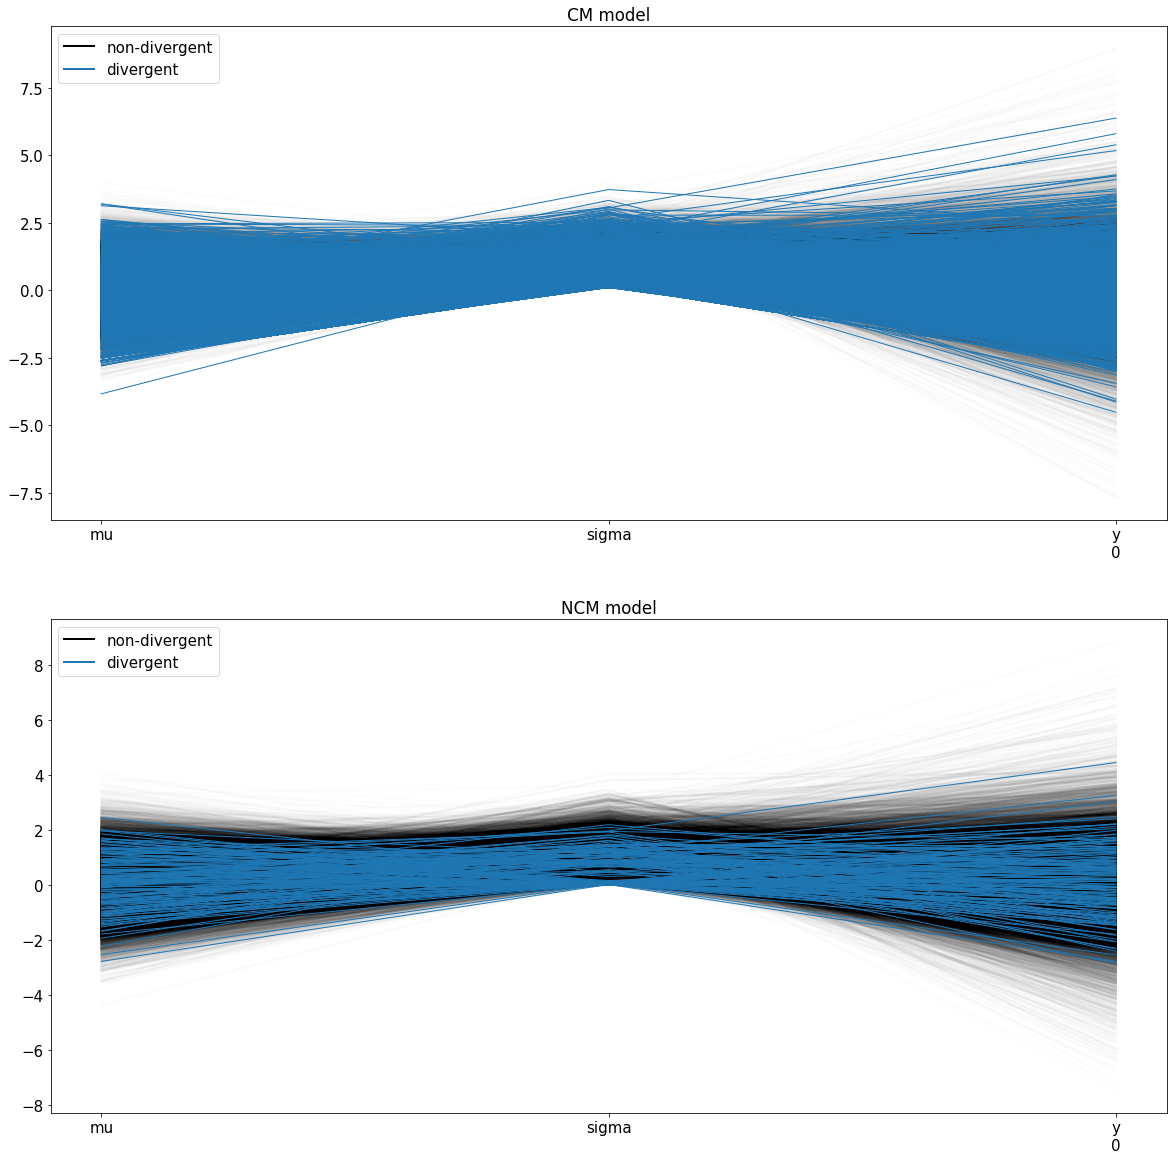

In [59]:
fig, axs = plt.subplots(2,1)
fig.set_size_inches(20,20)
axs[0].set_title('CM model')
axs[1].set_title('NCM model')
az.plot_parallel(trace_cm, var_names=['mu','sigma','y'], figsize=(20,20), shadend=0.01, colord='tab:blue', textsize=15, ax=axs[0])
az.plot_parallel(trace_ncm, var_names=['mu','sigma','y'], figsize=(20,20), shadend=0.01, colord='tab:blue', textsize=15,ax=axs[1])

#### A note on why we compute the log of the posterior

In short, this is done to avoid numerical overflow or underflow issues. When dealing with really large or small numbers, it is likely the limited precision of storage types (float, double etc.) can be an issue. In order to avoid this, the log of the probabilities are used instead in the calculations.